# Plotting and Visualization

In [71]:
%matplotlib inline
#@quangphu1912: this is to show the plot in the notebook 

In [100]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

Making informative visualizations (sometimes called plots) is one of the most important tasks in data analysis. It may be a part of the exploratory process — for example, to help identify outliers or needed data transformations, or as a way of generating ideas for models. For others, building an interactive visualization for the web may be the end goal. Python has many add-on libraries for making static or dynamic visualizations, but I’ll be mainly focused on matplotlib and libraries that build on top of it.<br>

matplotlib is a desktop plotting package designed for creating (mostly twodimensional) publication-quality plots. The project was started by John Hunter in 2002 to enable a MATLAB-like plotting interface in Python. The matplotlib and IPython communities have collaborated to simplify interactive plotting from the IPython shell (and now, Jupyter notebook). matplotlib supports various GUI backends on all operating systems and additionally can export visualizations to all of the common vector and raster graphics formats (PDF, SVG, JPG, PNG, BMP, GIF, etc.). With the exception of a few diagrams, nearly all of the graphics in this book were produced using matplotlib. Over time, matplotlib has spawned a number of add-on toolkits for data visualization that use matplotlib for their underlying plotting. One of these is seaborn, which we explore later in this chapter. The simplest way to follow the code examples in the chapter is to use interactive plotting in the Jupyter notebook. To set this up, execute the following statement in a Jupyter notebook:

In [50]:
%matplotlib notebook

## A Brief matplotlib API Primer

With matplotlib, we use the following import convention:

In [51]:
import matplotlib.pyplot as plt

After running %matplotlib notebook in Jupyter (or simply %matplotlib in IPython), we can try creating a simple plot. If everything is set up right, a line plot like Figure 9-1 should appear:

In [52]:
import numpy as np
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
plt.plot(data)

<IPython.core.display.Javascript object>

While libraries like seaborn and pandas’s built-in plotting functions will deal with many of the mundane details of making plots, should you wish to customize them beyond the function options provided, you will need to learn a bit about the matplotlib API.

**NOTE**<br>
There is not enough room in the book to give a comprehensive treatment to the breadth and depth of functionality in matplotlib. It should be enough to teach you the ropes to get up and running. The matplotlib gallery and documentation are the best resource for learning advanced features.

### 9.1.1. Figures and Subplots

Plots in matplotlib reside within a `Figure` object. You can create a new figure with `plt.figure:`

In [54]:
fig = plt.figure()

<IPython.core.display.Javascript object>

In IPython, an empty plot window will appear, but in Jupyter nothing will be shown until we use a few more commands. `plt.figure` has a number of options; notably, `figsize` will guarantee the figure has a certain size and aspect ratio if saved to disk.

You can’t make a plot with a blank figure. You have to create one or more `subplots` using `add_subplot`:

In [55]:
ax1 = fig.add_subplot(2, 2, 1)

This means that the figure should be 2 × 2 (so up to four plots in total), and we’re selecting the first of four subplots (numbered from 1). If you create the next two subplots, you’ll end up with a visualization that looks like Figure 9-2:

In [56]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

**TIP** <br>
One nuance of using Jupyter notebooks is that plots are reset after each cell is evaluated, so for more complex plots you must put all of the plotting commands in a single notebook cell.

In [57]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
#P note: there are 4 plots in the figure (2x2) and this syntax is to specify the location of the first 3 plots (identical plots)

<IPython.core.display.Javascript object>

When you issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), matplotlib draws on the last figure and subplot used (creating one if necessary), thus hiding the figure and subplot creation. So if we add the following command, you’ll get something like Figure 9-3:

In [58]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

<IPython.core.display.Javascript object>

The 'k--' is a style option instructing matplotlib to plot a black dashed line.<br>
The objects returned by `fig.add_subplot` here are `AxesSubplot` objects, on which you can directly plot on the other empty subplots by calling each one’s instance method (see Figure 9-4):

In [59]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

In [60]:
plt.close('all')

Creating a figure with a grid of subplots is a very common task, so matplotlib includes a convenience method, plt.subplots, that creates a new figure and returns a NumPy array containing the created subplot objects:

In [61]:
fig, axes = plt.subplots(2, 3)
axes

<IPython.core.display.Javascript object>

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

This is very useful, as the `axes` array can be easily indexed like a two dimensional array; for example, axes[0, 1]. You can also indicate that subplots should have the same x- or y-axis using `sharex` and `sharey`, respectively. This is especially useful when you’re comparing data on the same scale; otherwise, matplotlib autoscales plot limits independently. See Table 9-1 for more on this method

#### Adjusting the spacing around subplots

By default matplotlib leaves a certain amount of padding around the outside of the subplots and spacing between subplots. This spacing is all specified relative to the height and width of the plot, so that if you resize the plot either programmatically or manually using the GUI window, the plot will dynamically adjust itself. You can change the spacing using the `subplots_adjust` method on `Figure` objects, also available as a top-level function:

subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

wspace and hspace controls the percent of the figure width and figure height, respectively, to use as spacing between subplots. Here is a small example where I shrink the spacing all the way to zero (see Figure 9-5):

In [62]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

<IPython.core.display.Javascript object>

You may notice that the axis labels overlap. matplotlib doesn’t check whether the labels overlap, so in a case like this you would need to fix the labels yourself by specifying explicit tick locations and tick labels (we’ll look at how to do this in the following sections).

### 9.1.2. Colors, Markers, and Line Styles

Matplotlib’s main `plot` function accepts arrays of x and y coordinates and optionally a string abbreviation indicating color and line style. For example, to plot x versus y with green dashes, you would execute:

ax.plot(x, y, 'g--')

This way of specifying both color and line style in a string is provided as a convenience; in practice if you were creating plots programmatically you might prefer not to have to munge strings together to create plots with the desired style. The same plot could also have been expressed more explicitly as:

ax.plot(x, y, linestyle='--', color='g')

There are a number of color abbreviations provided for commonly used colors, but you can use any color on the spectrum by specifying its hex code (e.g., '#CECECE'). You can see the full set of line styles by looking at the docstring for plot (use plot? in IPython or Jupyter).

In [66]:
plt.plot??

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

Line plots can additionally have `markers` to highlight the actual data points. Since matplotlib creates a continuous line plot, interpolating between points, it can occasionally be unclear where the points lie. The marker can be part of the style string, which must have color followed by marker type and line style (see Figure 9-6):

In [76]:
plt.figure()

<Figure size 432x288 with 0 Axes>

This could also have been written more explicitly as:

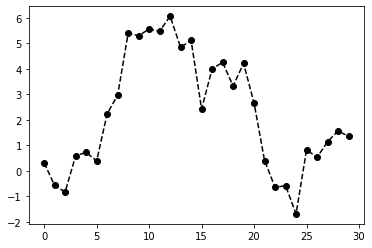

In [74]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')
plt.show() #P added

plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [45]:
plt.close('all')

For line plots, you will notice that subsequent points are linearly interpolated by default. This can be altered with the drawstyle option (Figure 9-7):

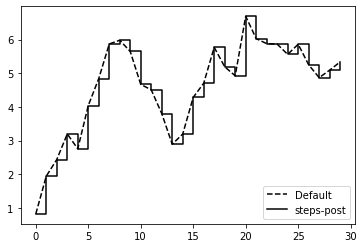

In [72]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')
plt.show() #P added

You may notice output like <matplotlib.lines.Line2D at ...> when you run this. matplotlib returns objects that reference the plot subcomponent that was just added. A lot of the time you can safely ignore this output. Here, since we passed the label arguments to plot, we are able to create a plot legend to identify each line using plt.legend.

**NOTE**<br>
You must call plt.legend (or ax.legend, if you have a reference to the axes) to create the legend, whether or not you passed the label options when plotting the data.

### 9.1.3. Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

For most kinds of plot decorations, there are two main ways to do things:<br>
 * using the procedural `pyplot` interface (i.e., `matplotlib.pyplot`) and 
 * the more object-oriented native matplotlib API.

The `pyplot` interface, designed for interactive use, consists of methods like `xlim`, `xticks`, and `xticklabels`. These control the plot range, tick locations, and tick labels, respectively. They can be used in two ways:
* Called with no arguments returns the current parameter value (e.g., plt.xlim() returns the current x-axis plotting range)
* Called with parameters sets the parameter value (e.g., plt.xlim([0, 10]), sets the x-axis range to 0 to 10)

All such methods act on the active or most recently created `AxesSubplot`. Each of them corresponds to two methods on the subplot object itself; in the case of `xlim` these are `ax.get_xlim` and `ax.set_xlim`. I prefer to use the subplot instance methods myself in the interest of being explicit (and especially when working with multiple subplots), but you can certainly use whichever you find more convenient.

To illustrate customizing the axes, I’ll create a simple figure and plot of a random walk (see Figure 9-8):

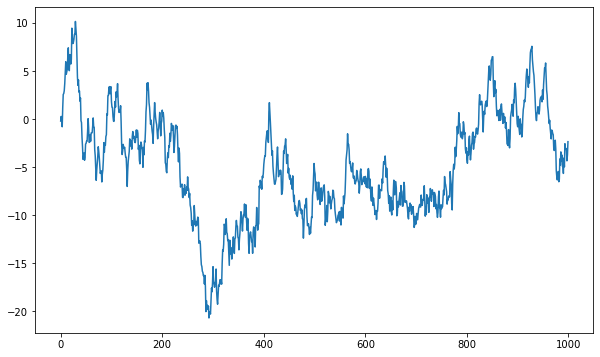

In [106]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

To change the x-axis ticks, it’s easiest to use `set_xticks` and `set_xticklabels`. The former instructs matplotlib where to place the ticks along the data range; by default these locations will also be the labels. But we can set any other values as the labels using set_xticklabels:

In [78]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

The rotation option sets the x tick labels at a 30-degree rotation. Lastly, set_xlabel gives a name to the x-axis and set_title the subplot title (see Figure 9-9 for the resulting figure):

In [102]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5, 3.1999999999999993, 'Stages')

In [105]:
ax.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'

Modifying the y-axis consists of the same process, substituting y for x in the above. The axes class has a set method that allows batch setting of plot properties. From the prior example, we could also have written:

```py
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)
```

#### Adding legends

Legends are another critical element for identifying plot elements. There are a couple of ways to add one. The easiest is to pass the label argument when adding each piece of the plot:

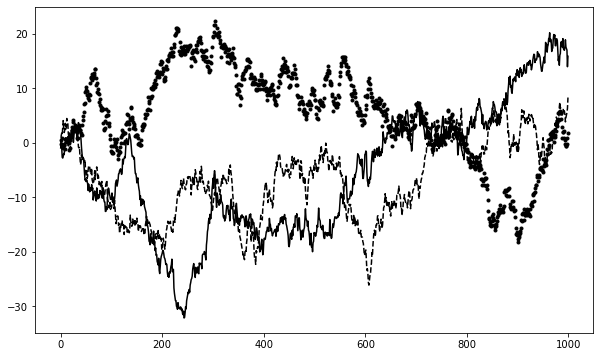

In [107]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

Once you’ve done this, you can either call ax.legend() or plt.legend() to automatically create a legend. The resulting plot is in Figure 9-10:

In [120]:
ax.legend(loc='best')

NameError: name 'subplot' is not defined

In [112]:
#P checking type of ax to see why I could not call the show func
ax?

Type:            AxesSubplot
String form:     AxesSubplot(0.125,0.125;0.775x0.755)
File:            d:\users\phu.le2\anaconda3\lib\site-packages\matplotlib\axes\_subplots.py
Docstring:       <no docstring>
Class docstring:
Base class for subplots, which are :class:`Axes` instances with
additional methods to facilitate generating and manipulating a set
of :class:`Axes` within a figure.
Init docstring: 
Parameters
----------
fig : `matplotlib.figure.Figure`

*args : tuple (*nrows*, *ncols*, *index*) or int
    The array of subplots in the figure has dimensions ``(nrows,
    ncols)``, and *index* is the index of the subplot being created.
    *index* starts at 1 in the upper left corner and increases to the
    right.

    If *nrows*, *ncols*, and *index* are all single digit numbers, then
    *args* can be passed as a single 3-digit number (e.g. 234 for
    (2, 3, 4)).

**kwargs
    Keyword arguments are passed to the Axes (sub)class constructor.


The legend method has several other choices for the location loc argument. See the docstring (with ax.legend?) for more information.<br>
The loc tells matplotlib where to place the plot. *If you aren’t picky, `'best'` is a good option, as it will choose a location that is most out of the way*. To exclude one or more elements from the legend, pass no label or label='_nolegend_'.

### 9.1.4. Annotations and Drawing on a Subplot

In addition to the standard plot types, *you may wish to draw your own plot annotations, which could consist of text, arrows, or other shapes*. You can add annotations and text using the `text`, `arrow`, and `annotate` functions. text draws text at given coordinates (x, y) on the plot with optional custom styling:

```py
ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)
```

Annotations can draw both text and arrows arranged appropriately. As an example, let’s plot the closing S&P 500 index price since 2007 (obtained from Yahoo! Finance) and annotate it with some of the important dates from the 2008–2009 financial crisis. You can most easily reproduce this code example in a single cell in a Jupyter notebook. See Figure 9-11 for the result:

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

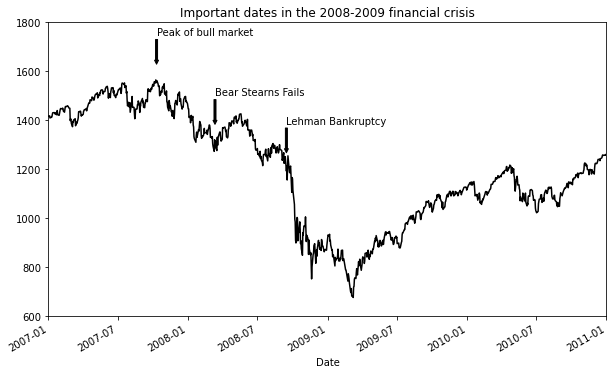

In [121]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

There are a couple of important points to highlight in this plot: the ax.annotate method can draw labels at the indicated x and y coordinates.<br>
We use the `set_xlim` and `set_ylim` methods to manually set the start and end boundaries for the plot rather than using matplotlib’s default. Lastly, `ax.set_title` adds a main title to the plot.<br>
See the online matplotlib gallery for many more annotation examples to learn from.

Drawing shapes requires some more care. matplotlib has objects that represent many common shapes, referred to as `patches`. Some of these, like `Rectangle` and `Circle`, are found in matplotlib.pyplot, but the full set is located in `matplotlib.patches`.<br>
To add a shape to a plot, you create the patch object shp and add it to a subplot by calling ax.add_patch(shp) (see Figure 9-12):

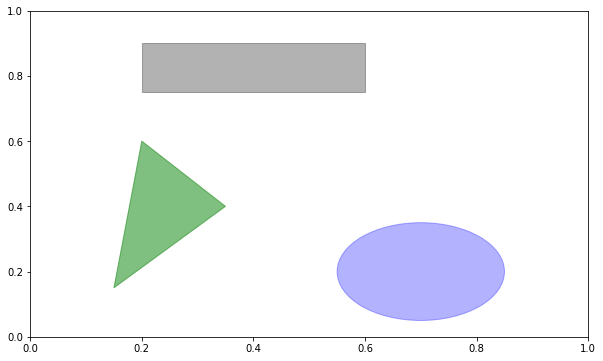

In [123]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

If you look at the implementation of many familiar plot types, you will see that they are assembled from patches.

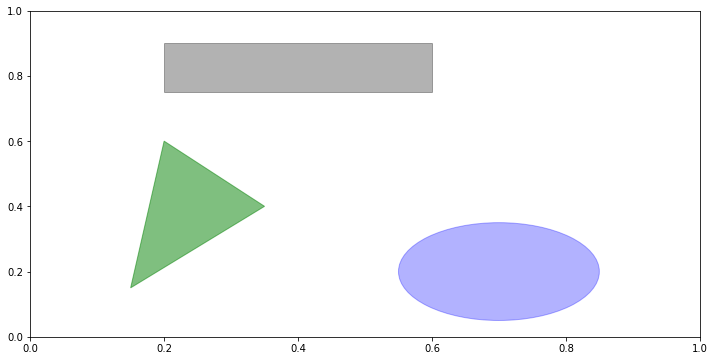

In [124]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 9.1.5. Saving Plots to File

You can save the active figure to file using `plt.savefig`. This method is equivalent to the figure object’s `savefig` instance method. For example, to save an SVG version of a figure, you need only type:

```py
plt.savefig('figpath.svg')
```

The file type is inferred from the file extension. So if you used .pdf instead, you would get a PDF. There are a couple of important options that I use frequently for publishing graphics: 
* `dpi`, which controls the dots-per-inch resolution, and 
* `bbox_inches`, which can trim the whitespace around the actual figure.
To get the same plot as a PNG with minimal whitespace around the plot and at 400 DPI, you would do:

```py
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
```

`savefig` doesn’t have to write to disk; it can also write to any file-like object, such as a BytesIO:

```py
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
```

### 9.1.6. matplotlib Configuration

matplotlib comes configured with color schemes and defaults that are geared primarily toward preparing figures for publication. Fortunately, nearly all of the default behavior can be customized via an extensive `set of global parameters` governing figure size, subplot spacing, colors, font sizes, grid styles, and so on. One way to modify the configuration programmatically from Python is to use the `rc method`; for example, to set the *global default figure size to be 10 × 10*, you could enter:

```py
plt.rc('figure', figsize=(10, 10))
```

The first argument to rc is the component you wish to customize, such as 'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend', or many others. After that can follow a sequence of keyword arguments indicating the new parameters. An easy way to write down the options in your program is as a dict:

```py
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)
```

For more extensive customization and to see a list of all the options, matplotlib comes with a configuration file matplotlibrc in the matplotlib/mpl-data directory. If you customize this file and place it in your home directory titled .matplotlibrc, it will be loaded each time you use matplotlib.<br>
As we’ll see in the next section, the seaborn package has several built-in plot themes or styles that use matplotlib’s configuration system internally.

## 9.2. Plotting with pandas and seaborn

matplotlib can be a fairly low-level tool. You assemble a plot from its base components: the data display (i.e., the type of plot: line, bar, box, scatter, contour, etc.), legend, title, tick labels, and other annotations. <br>

In pandas we may have multiple columns of data, along with row and column labels. pandas itself has built-in methods that simplify creating visualizations from DataFrame and Series objects. Another library is `seaborn`, a statistical graphics library created by Michael Waskom. Seaborn simplifies creating many common visualization types.

**TIP**<br>
Importing seaborn modifies the default matplotlib color schemes and plot styles to improve readability and aesthetics. Even if you do not use the seaborn API, you may prefer to import seaborn as a simple way to improve the visual aesthetics of general matplotlib plots

### 9.2.1. Line Plots

In [125]:
plt.close('all')

Series and DataFrame each have a plot attribute for making some basic plot types. *By default, `plot()` makes line plots* (see Figure 9-13):

<AxesSubplot:>

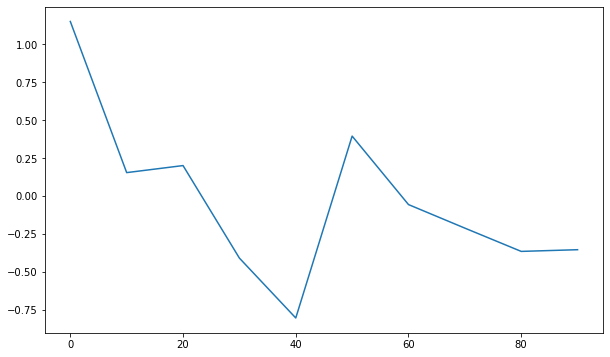

In [126]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

The Series object’s index is passed to matplotlib for plotting on the x-axis, though you can disable this by passing `use_index=False`. The x-axis ticks and limits can be adjusted with the `xticks` and `xlim` options, and y-axis respectively with `yticks` and `ylim`. See Table 9-3 for a full listing of plot options. I’ll comment on a few more of them throughout this section and leave the rest to you to explore.

Most of pandas’s plotting methods accept an optional ax parameter, which can be a matplotlib subplot object. This gives you more flexible placemen tof subplots in a grid layout.
<br>
DataFrame’s plot method plots each of its columns as a different line on the same subplot, creating a legend automatically (see Figure 9-14):

In [129]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-0.490551,-1.416465,0.232588,2.162370
10,-1.194287,-2.120194,1.044227,2.846615
20,-2.532718,-0.239484,2.372368,2.497924
30,-3.085840,0.262902,3.916536,1.923660
40,-2.195295,-0.712773,4.853403,1.964935
50,-2.661122,-1.167952,5.853555,1.243440
60,-2.882341,1.053355,5.528217,0.484797
70,-4.717281,-0.054348,6.490543,0.183981
80,-3.415574,0.981388,6.968717,-0.000155
90,-4.790117,1.308769,6.024267,-1.670427


<AxesSubplot:>

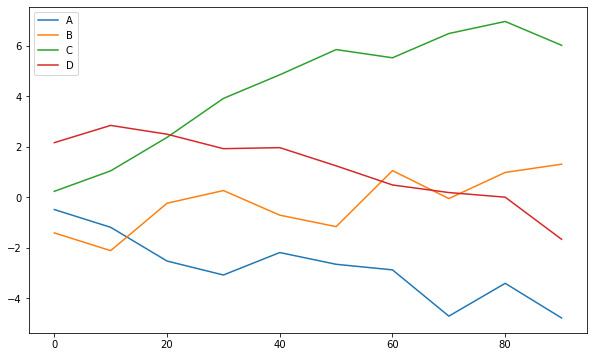

In [130]:
df.plot()

The plot attribute contains a “family” of methods for different plot types.
For example, `df.plot()` is equivalent to *df.plot.line()*. We’ll explore some of these methods next.

### 9.2.2. Bar Plots

The `plot.bar()` and `plot.barh()` make vertical and horizontal bar plots, respectively. In this case, the Series or DataFrame index will be used as the x (bar) or y (barh) ticks (see Figure 9-15):

<AxesSubplot:>

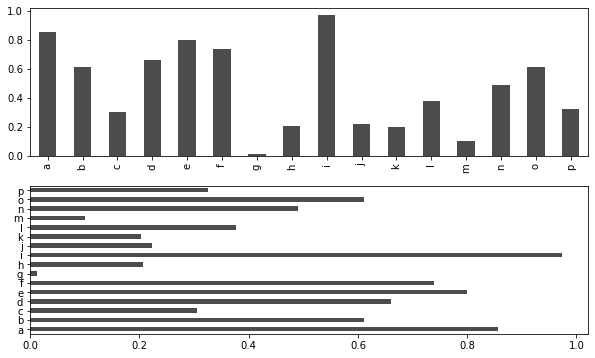

In [131]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)
#The options color='k' and alpha=0.7 set the color of the plots to black and use partial transparency on the filling. (author note)

With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value. See Figure 9-16:

In [132]:
np.random.seed(12348)

In [134]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.355275,0.513329,0.306168,0.945081
two,0.932493,0.520682,0.402644,0.587002
three,0.333642,0.879628,0.852004,0.620666
four,0.464247,0.846397,0.442342,0.189303
five,0.643572,0.600775,0.427939,0.939054
six,0.505451,0.462759,0.839412,0.350779


<AxesSubplot:>

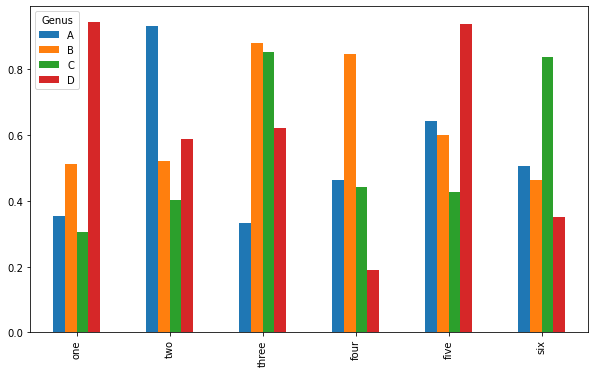

In [136]:
df.plot.bar()
#Note that the name “Genus” on the DataFrame’s columns is used to title the legend (author note).

In [ ]:
plt.figure()

We create stacked bar plots from a DataFrame by passing `stacked=True`, resulting in the value in each row being stacked together (see Figure 9-17):

<AxesSubplot:>

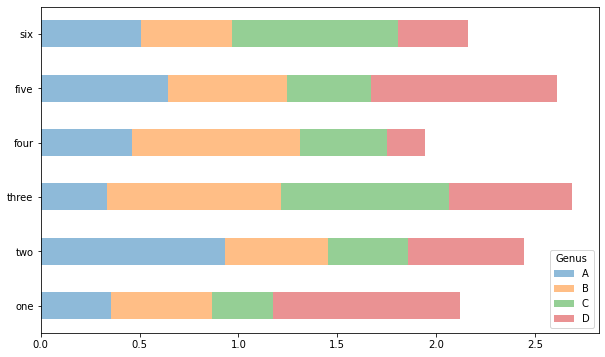

In [137]:
df.plot.barh(stacked=True, alpha=0.5)

**NOTE**<br>
A useful recipe for bar plots is to visualize a Series’s value frequency using *value_counts*: `s.value_counts().plot.bar()`.

In [138]:
plt.close('all')

Returning to the tipping dataset used earlier in the book, suppose we wanted to make a stacked bar plot showing the percentage of data points for each party size on each day. I load the data using read_csv and make a crosstabulation by day and party size:

In [139]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts
# Not many 1- and 6-person parties

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [140]:
party_counts = party_counts.loc[:, 2:5]

Then, normalize so that each row sums to 1 and make the plot (see Figure 9-18):

In [142]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

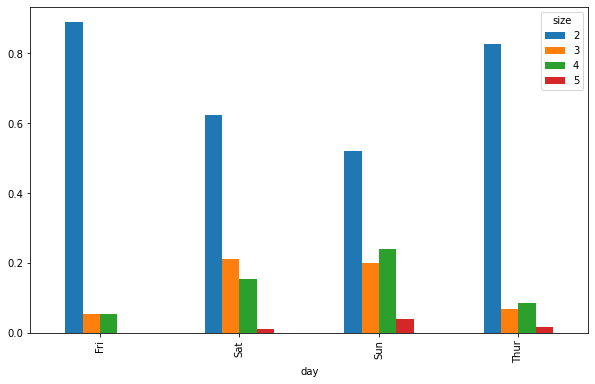

In [143]:
party_pcts.plot.bar()

So you can see that party sizes appear to increase on the weekend in this dataset.

In [144]:
plt.close('all')

With data that requires aggregation or summarization before making a plot, using the `seaborn` package can make things much simpler. Let’s look now at the tipping percentage by day with seaborn (see Figure 9-19 for the resulting plot):

In [145]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

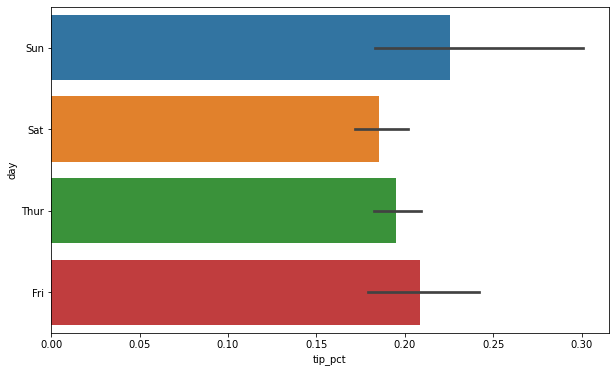

In [146]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

Plotting functions in seaborn take a data argument, which can be a pandas DataFrame. The other arguments refer to column names. Because there are multiple observations for each value in the day, *the bars are the average value of tip_pct*. The *black lines drawn on the bars represent the 95% confidence interval* (this can be configured through optional arguments).

In [ ]:
plt.close('all')

seaborn.barplot has a `hue` option that enables us to split by an additional categorical value (Figure 9-20):

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

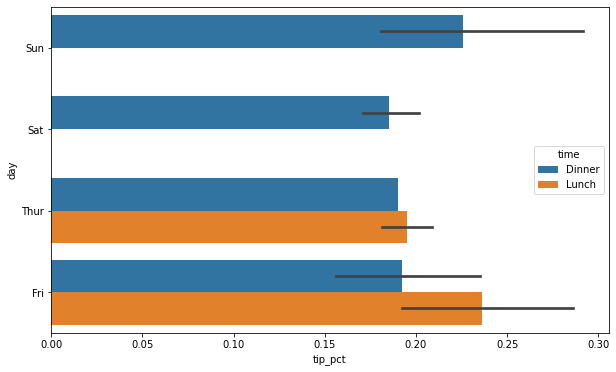

In [147]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [ ]:
plt.close('all')

Notice that seaborn has automatically changed the aesthetics of plots: the default color palette, plot background, and grid line colors. You can switch between different plot appearances using `seaborn.set`:

In [148]:
sns.set(style="whitegrid")

### 9.2.3. Histograms and Density Plots

In [ ]:
plt.figure()

A histogram is a kind of bar plot that gives a discretized display of value frequency. The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted.<br>
Using the tipping data from before, we can make a histogram of tip percentages of the total bill using the `plot.hist` method on the Series (see Figure 9-21):

<AxesSubplot:ylabel='Frequency'>

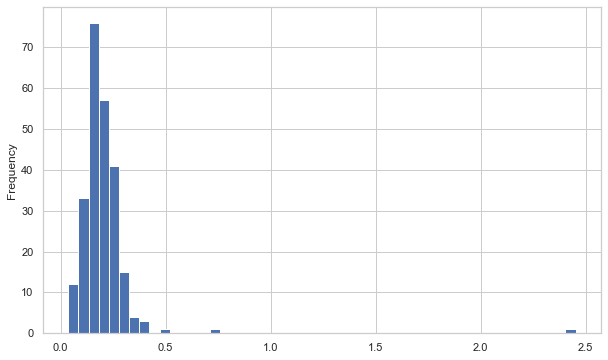

In [149]:
tips['tip_pct'].plot.hist(bins=50)

In [ ]:
plt.figure()

A related plot type is a `density plot`, which is formed by *computing an estimate of a continuous probability distribution that might have generated the observed data.* The usual procedure is to approximate this distribution as a mixture of “kernels” — that is, simpler distributions like the normal distribution. Thus, density plots are also known as `kernel density estimate (KDE)` plots. Using plot.kde makes a density plot using the conventional mixture-of-normals estimate (see Figure 9-22):

<AxesSubplot:ylabel='Density'>

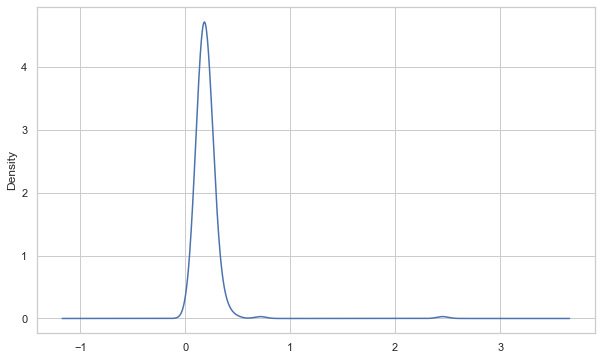

In [150]:
tips['tip_pct'].plot.density()

In [ ]:
plt.figure()

Seaborn makes histograms and density plots even easier through its `distplot` method, which can plot both a histogram and a continuous density estimate simultaneously. As an example, consider a bimodal distribution consisting of draws from two different standard normal distributions (see Figure 9-23):

D:\Users\phu.le2\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

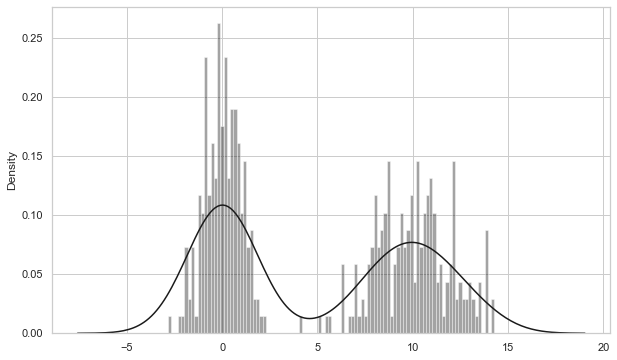

In [153]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
# sns.distplot(values, bins=100, color='k')
sns.distplot(values, bins=100, color='k')

### 9.2.4. Scatter or Point Plots

Point plots or scatter plots can be a useful way of examining the relationship between two one-dimensional data series. For example, here we load the macrodata dataset from the statsmodels project, select a few variables, then compute log differences:

In [154]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [ ]:
plt.figure()

We can then use seaborn’s regplot method, which makes a *scatter plot* and *fits a linear regression line* (see Figure 9-24):

D:\Users\phu.le2\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

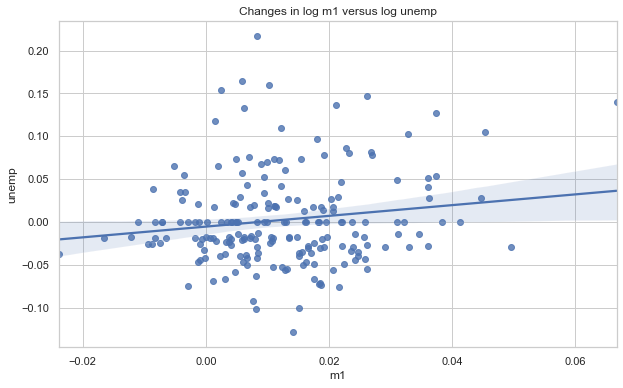

In [155]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

In exploratory data analysis it’s helpful to be able to look at all the scatter plots among a group of variables; this is known as a `pairs plot` or `scatter plot matrix`. Making such a plot from scratch is a bit of work, so seaborn has a convenient pairplot function, which supports placing histograms or density estimates of each variable along the diagonal (see Figure 9-25 for the resulting plot):

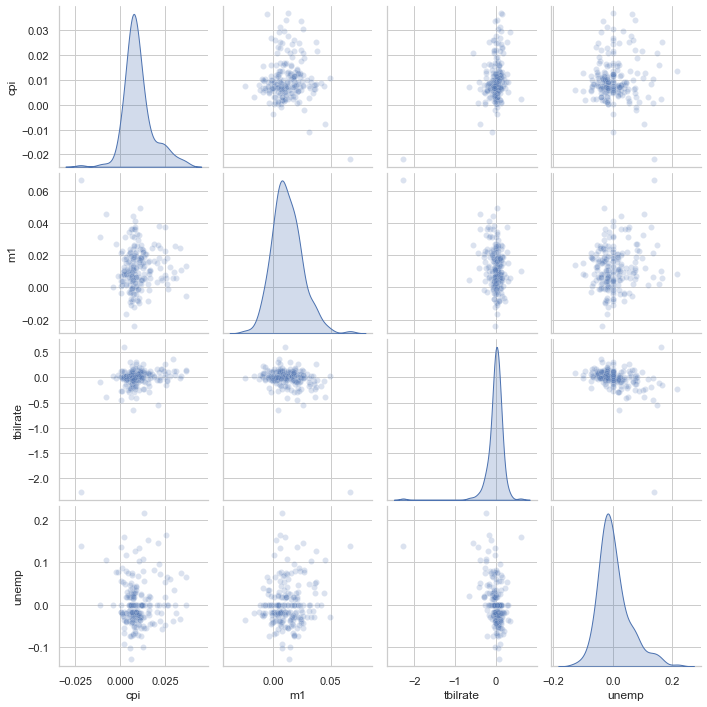

In [159]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

You may notice the plot_kws argument. This enables us to pass down configuration options to the individual plotting calls on the off-diagonal elements. Check out the seaborn.pairplot docstring for more granular configuration options.

### 9.2.5. Facet Grids and Categorical Data

What about datasets where we have additional grouping dimensions? One way to visualize data with many categorical variables is to use a `facet grid`. Seaborn has a useful built-in function `factorplot` that simplifies making many kinds of faceted plots (see Figure 9-26 for the resulting plot):

D:\Users\phu.le2\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


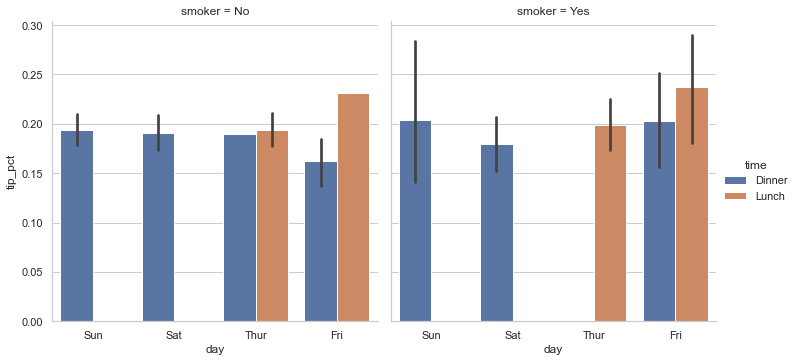

In [160]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

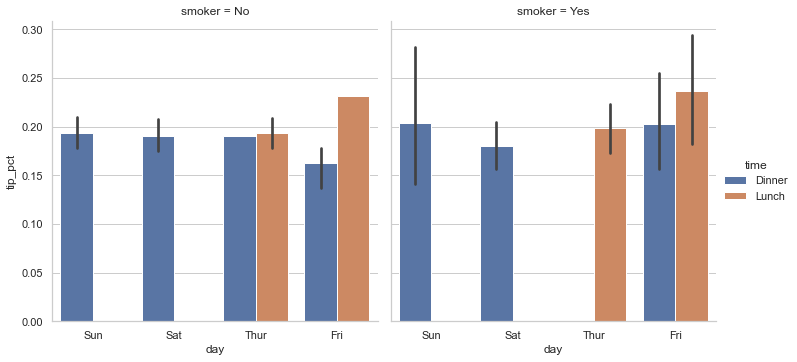

In [161]:
#P update after the error message above
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

Instead of grouping by 'time' by different bar colors within a facet, we can also expand the facet grid by adding one row per time value (Figure 9-27):

D:\Users\phu.le2\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


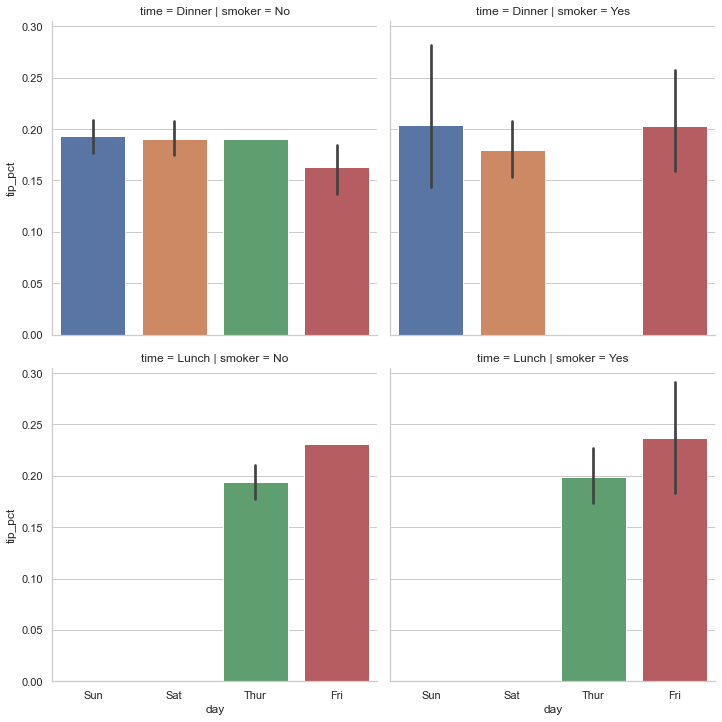

In [162]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

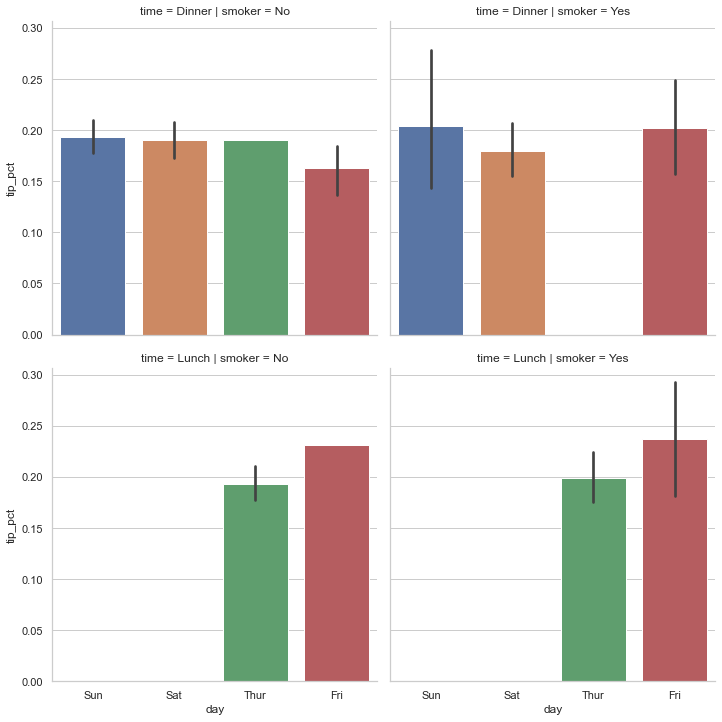

In [163]:
#P update after the error message above
sns.catplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

`factorplot` supports other plot types that may be useful depending on what you are trying to display. For example, box plots (which show the median, quartiles, and outliers) can be an effective visualization type (Figure 9-28):

D:\Users\phu.le2\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


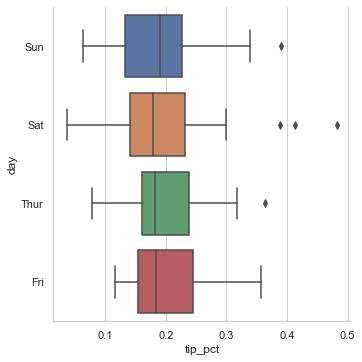

In [166]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

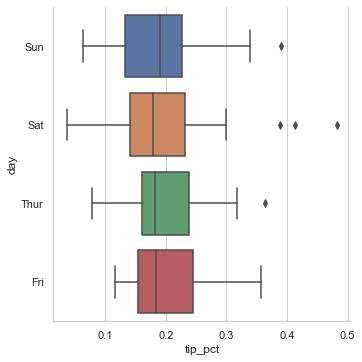

In [167]:
sns.catplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

You can create your own facet grid plots using the more general `seaborn.FacetGrid` class. See the seaborn documentation for more

## 9.3. Other Python Visualization Tools

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion